In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv', delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
data['age'] = round(data['age'] // 365)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Analysing objective features

Text(0.5, 1.0, "Boxplot pour l'âge")

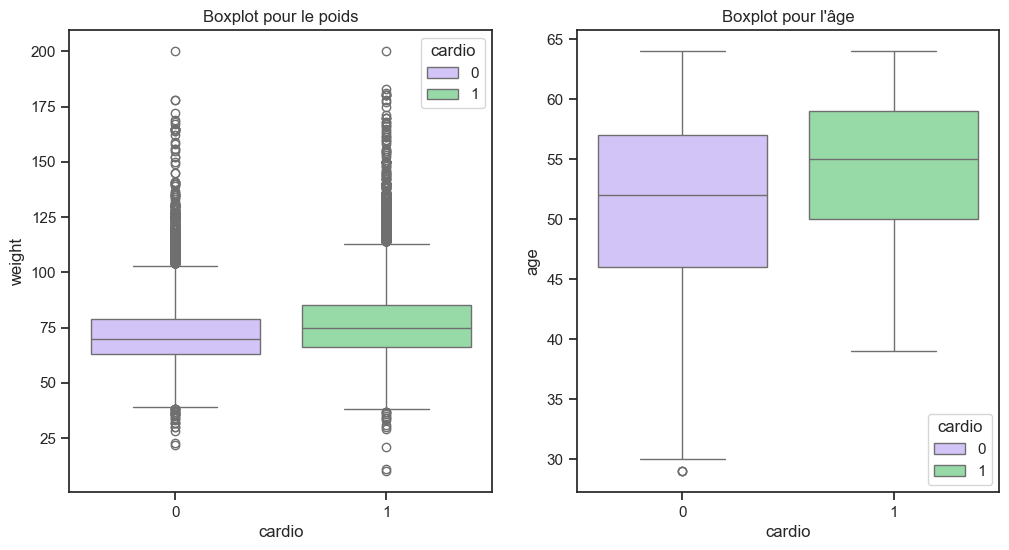

In [6]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x="cardio", y="weight",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[0])

sns.boxplot(x="cardio", y="age",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[1])

axes[0].set_title('Boxplot pour le poids')
axes[1].set_title('Boxplot pour l\'âge')

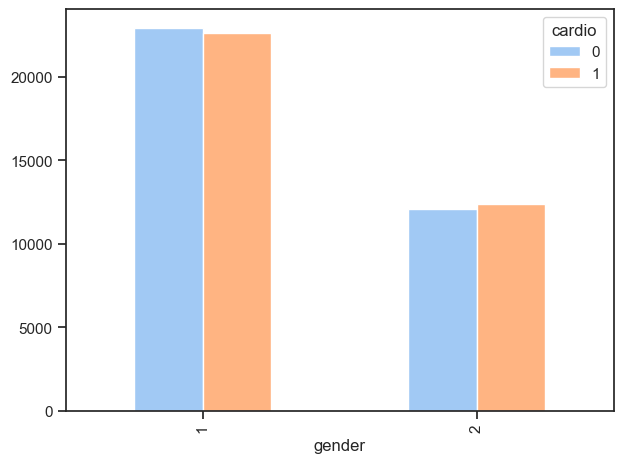

In [7]:
gender_crosstab = pd.crosstab(index=data['gender'], columns=data['cardio'], margins=True)
gender_crosstab.drop(['All'], axis=1, inplace=True)
gender_crosstab.drop(['All'], axis=0, inplace=True)

#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
gender_crosstab.plot(kind='bar')
plt.tight_layout()
plt.show()

### Conclusion
Dans ce jeu de données : 
- Les __femmes__ qui souffrent d'une maladie cardio-vasculaire sont __*moins*__ des femmes qui sont saines
- Les __hommes__ qui souffrent d'une maladie cardio-vasculaire sont __*plus*__ des femmes qui sont sains

<Axes: xlabel='age'>

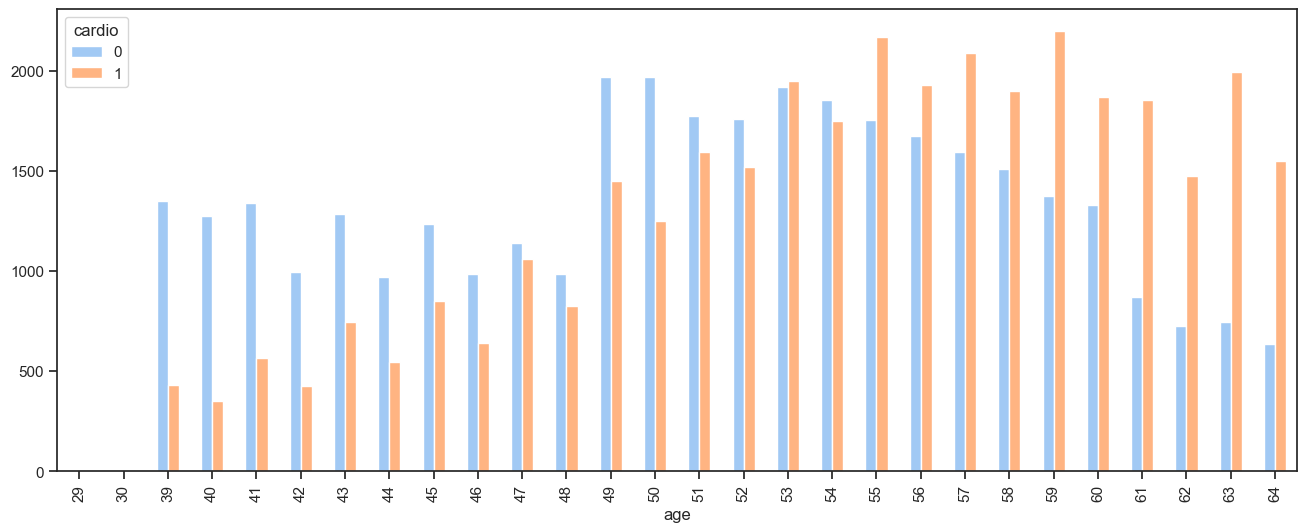

In [8]:
age_crosstab = pd.crosstab(index=data['age'], columns=data['cardio'], margins=True)
age_crosstab.drop(['All'], axis=1, inplace=True)
age_crosstab.drop(['All'], axis=0, inplace=True)

fig, axes = plt.subplots(figsize=(16, 6))
age_crosstab.plot(kind='bar', ax=axes)

On remarque qu'à partir de 55 ans, le nombre des gens atteints par une maladie cardio-vasculaire depasse le nobre des gens sains

<Figure size 1000x600 with 0 Axes>

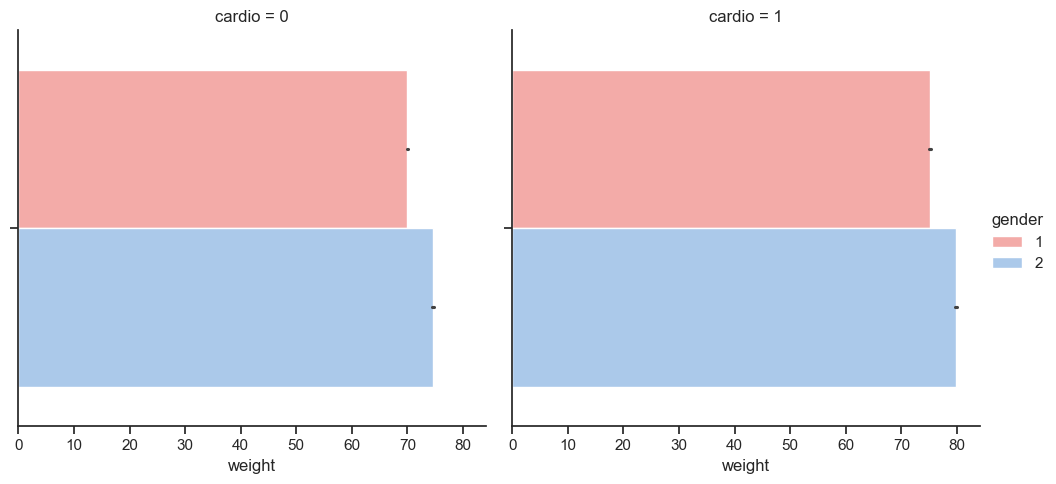

In [9]:
plt.figure(figsize=(10, 6))

sns.catplot(x="weight", hue="gender", col="cardio", data=data, kind='bar', palette=["r", "b"])

plt.show()


On observe que, en moyenne, les patients avec une maladie cardio-vasculaire sont plus lourds que les patients sans maladie cardio-vasculaire.

### Indice de masse corporelle

In [10]:
data['IMC'] = data['weight']/((data['height']/100)**2)

<Figure size 1000x600 with 0 Axes>

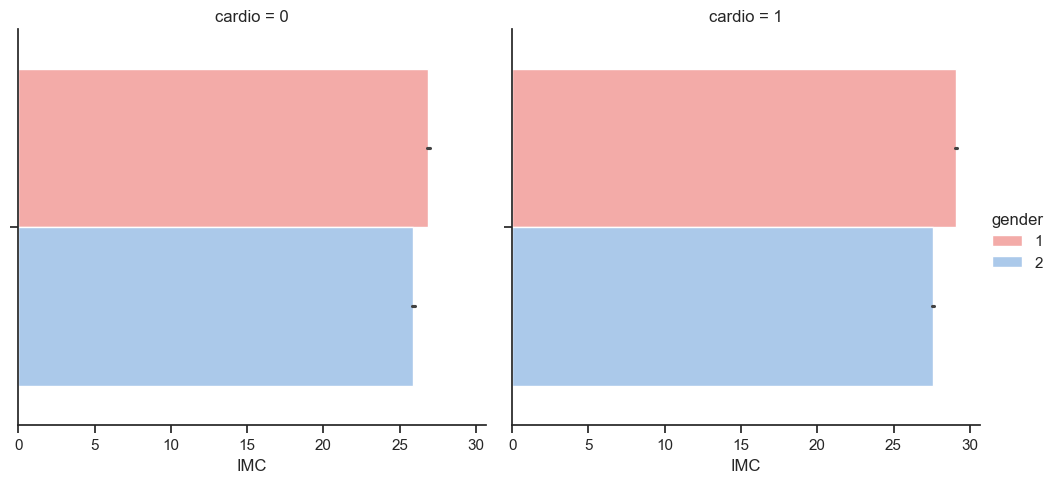

In [11]:
plt.figure(figsize=(10, 6))

sns.catplot(x="IMC", hue="gender", col="cardio", data=data, kind='bar', palette=["r", "b"])

plt.show()

On remarque que les personnes qui ont une maladie cardio-vasculaire sont en surpoids.

# Analysing examination features

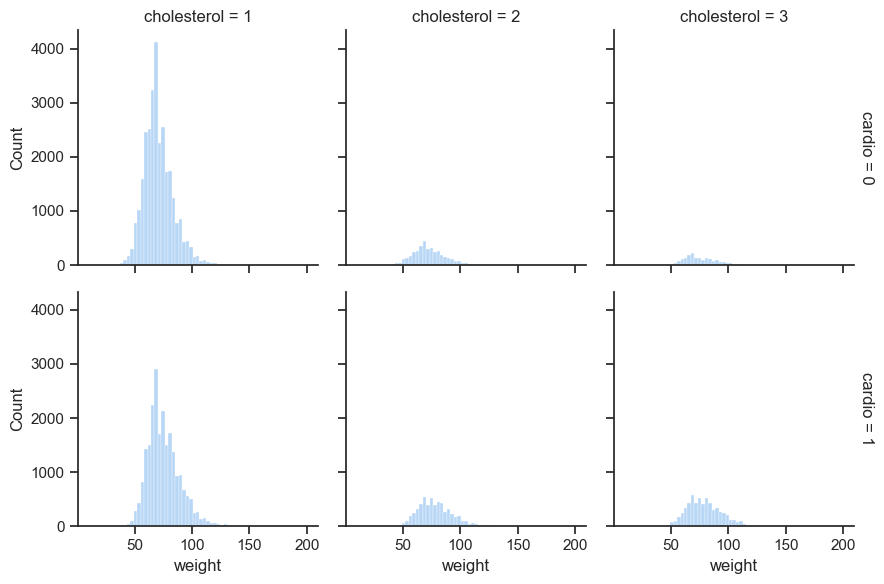

In [12]:
sns.displot(
    data, x="weight", col="cholesterol", row="cardio",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

## Distribution des pressions artérielles (ap_hi et ap_lo)

Text(0.5, 1.0, 'Boxplot pour ap_lo')

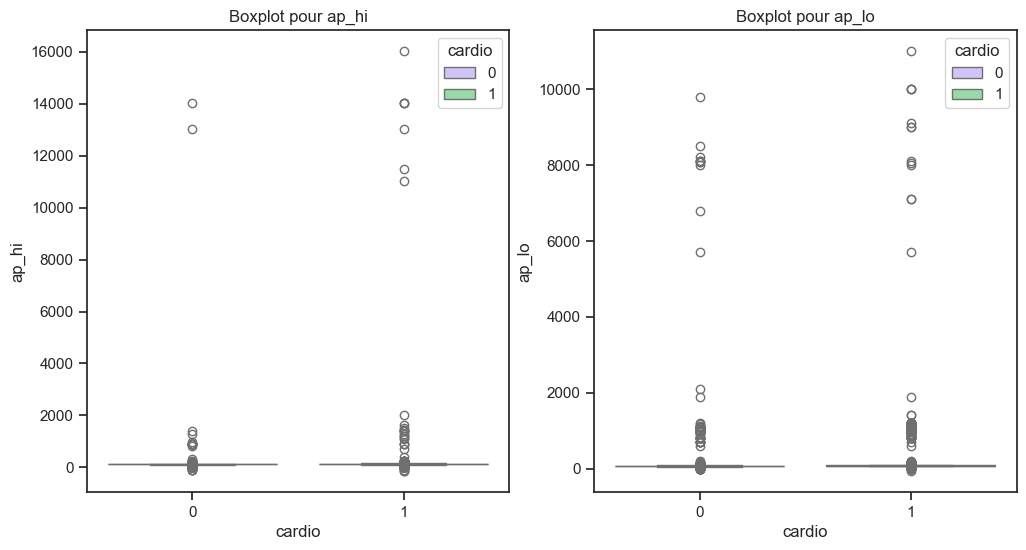

In [13]:
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.boxplot(x="cardio", y="ap_hi",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[0])

sns.boxplot(x="cardio", y="ap_lo",
            hue="cardio", palette=["m", "g"],
            data=data, ax=axes[1])

axes[0].set_title('Boxplot pour ap_hi')
axes[1].set_title('Boxplot pour ap_lo')

Des valeurs extrêmement élevées pour la pression artérielle systolique (ap_hi) ou la pression artérielle diastolique (ap_lo), telles que celles dépassant 10000, sont généralement considérées comme irréalistes et peuvent résulter d'erreurs de mesure ou de saisie de données. En pratique médicale, de telles valeurs sont inhabituelles et ne correspondent pas aux plages normales de la pression artérielle.

In [14]:
cleaned_data = data[(10 < data['ap_hi']) & (data['ap_hi'] < 250) & (10 < data['ap_lo']) & (data['ap_lo'] < 200)]

In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68962 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68962 non-null  int64  
 1   age          68962 non-null  int64  
 2   gender       68962 non-null  int64  
 3   height       68962 non-null  int64  
 4   weight       68962 non-null  float64
 5   ap_hi        68962 non-null  int64  
 6   ap_lo        68962 non-null  int64  
 7   cholesterol  68962 non-null  int64  
 8   gluc         68962 non-null  int64  
 9   smoke        68962 non-null  int64  
 10  alco         68962 non-null  int64  
 11  active       68962 non-null  int64  
 12  cardio       68962 non-null  int64  
 13  IMC          68962 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.9 MB


## Relation entre la pression systolique et diastolique

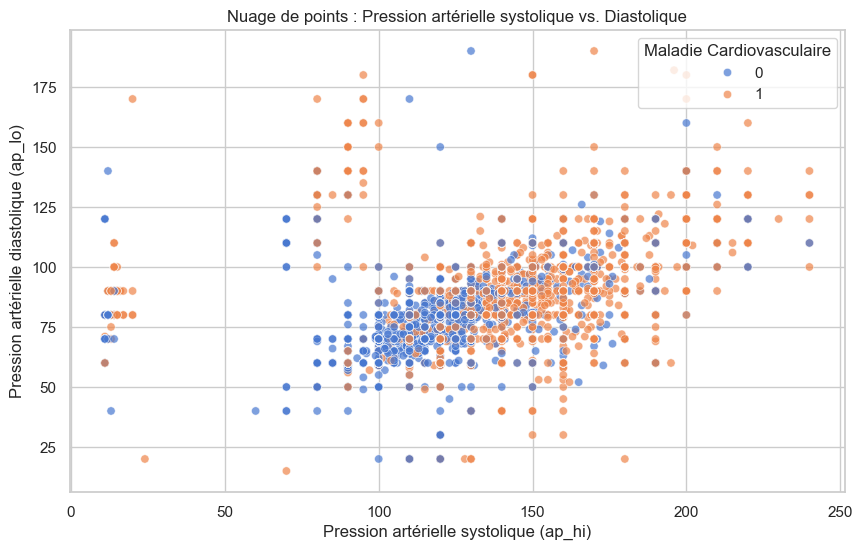

In [16]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=cleaned_data, palette="muted", alpha=0.7)
plt.title('Nuage de points : Pression artérielle systolique vs. Diastolique')
plt.xlabel('Pression artérielle systolique (ap_hi)')
plt.ylabel('Pression artérielle diastolique (ap_lo)')
plt.legend(title='Maladie Cardiovasculaire', loc='upper right')
plt.show()

## Répartition du cholestérol et de la glycémie

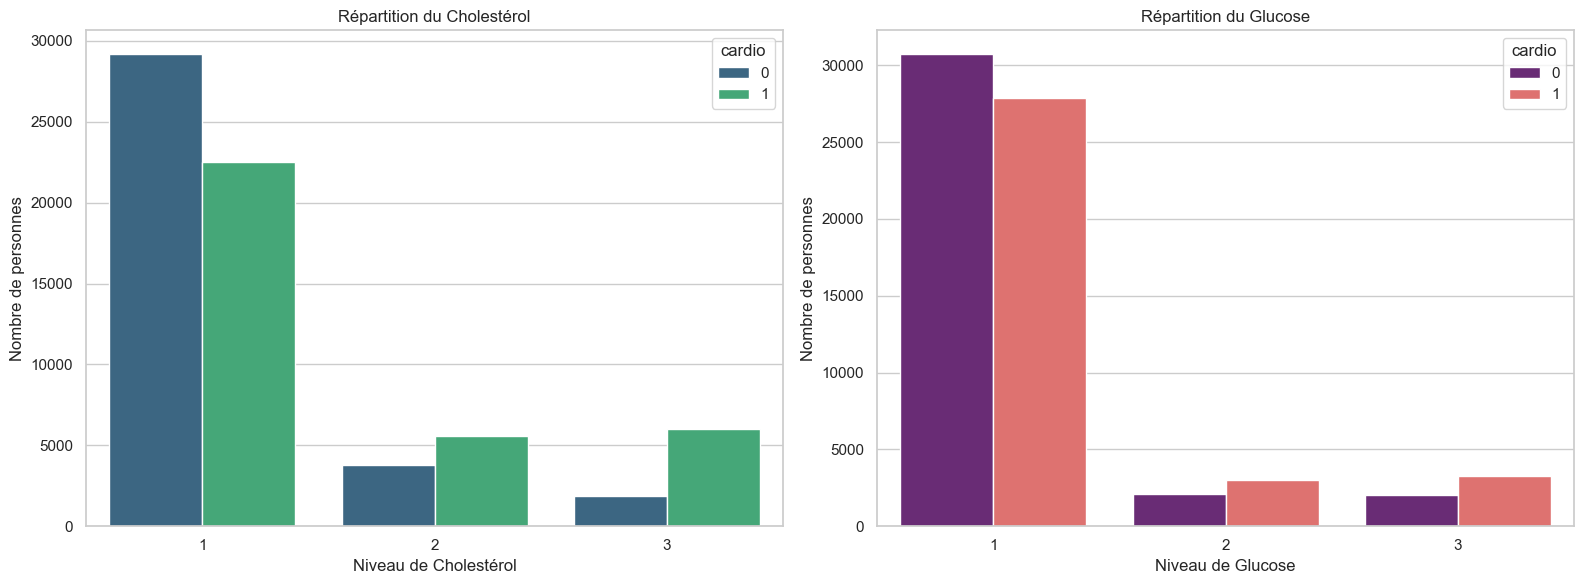

In [17]:
# Paramètres de style
sns.set_theme(style="whitegrid")

# Diagramme à barres pour le cholestérol
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='cholesterol', hue='cardio', data=cleaned_data, palette='viridis')
plt.title('Répartition du Cholestérol')
plt.xlabel('Niveau de Cholestérol')
plt.ylabel('Nombre de personnes')

# Diagramme à barres pour le glucose
plt.subplot(1, 2, 2)
sns.countplot(x='gluc', hue='cardio', data=cleaned_data, palette='magma')
plt.title('Répartition du Glucose')
plt.xlabel('Niveau de Glucose')
plt.ylabel('Nombre de personnes')

# Ajuste le layout
plt.tight_layout()

# Affiche la figure
plt.show()

On remarque que la plus part des personnes souffrant d'une maladie cardio-vasculaire ont un niveau normal de cholestérol et du glucose 

## Visualisation avec des diagrammes en violon

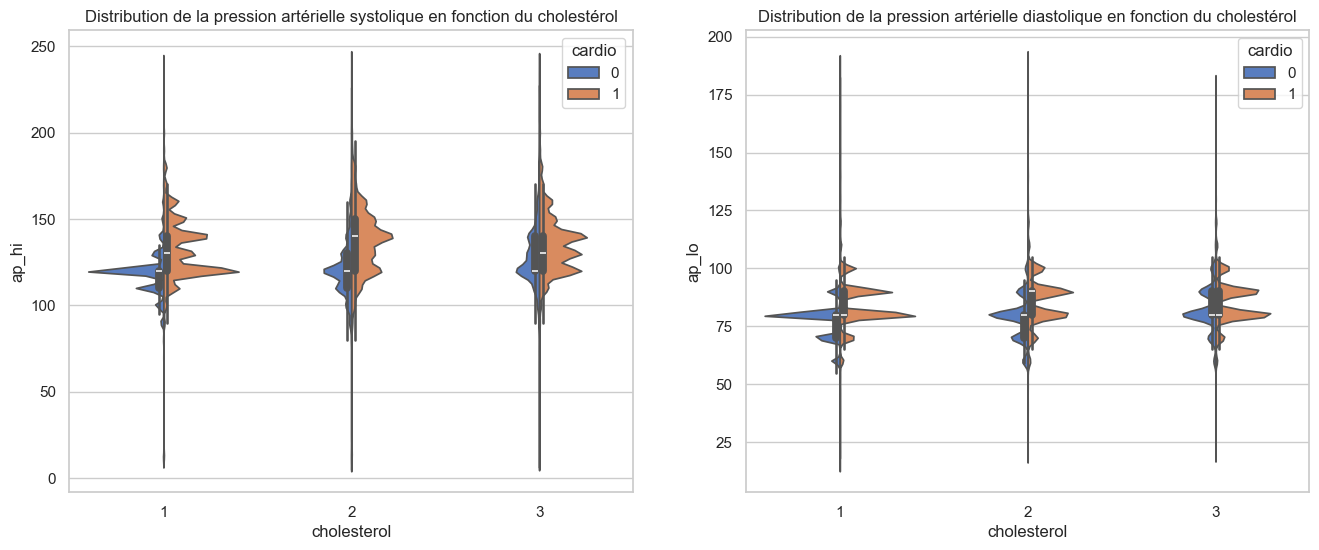

In [18]:
# Paramètres de style
sns.set_theme(style="whitegrid")

# Diagramme en violon pour la pression artérielle systolique en fonction du cholestérol
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="cholesterol", y="ap_hi", hue="cardio", data=cleaned_data, split=True, palette="muted", ax=axes[0])
axes[0].set_title('Distribution de la pression artérielle systolique en fonction du cholestérol')

sns.violinplot(x="cholesterol", y="ap_lo", hue="cardio", data=cleaned_data, split=True, palette="muted", ax=axes[1])
axes[1].set_title('Distribution de la pression artérielle diastolique en fonction du cholestérol')
plt.show()


# Analysing Subjective Features

## Tabac et tension arterielle

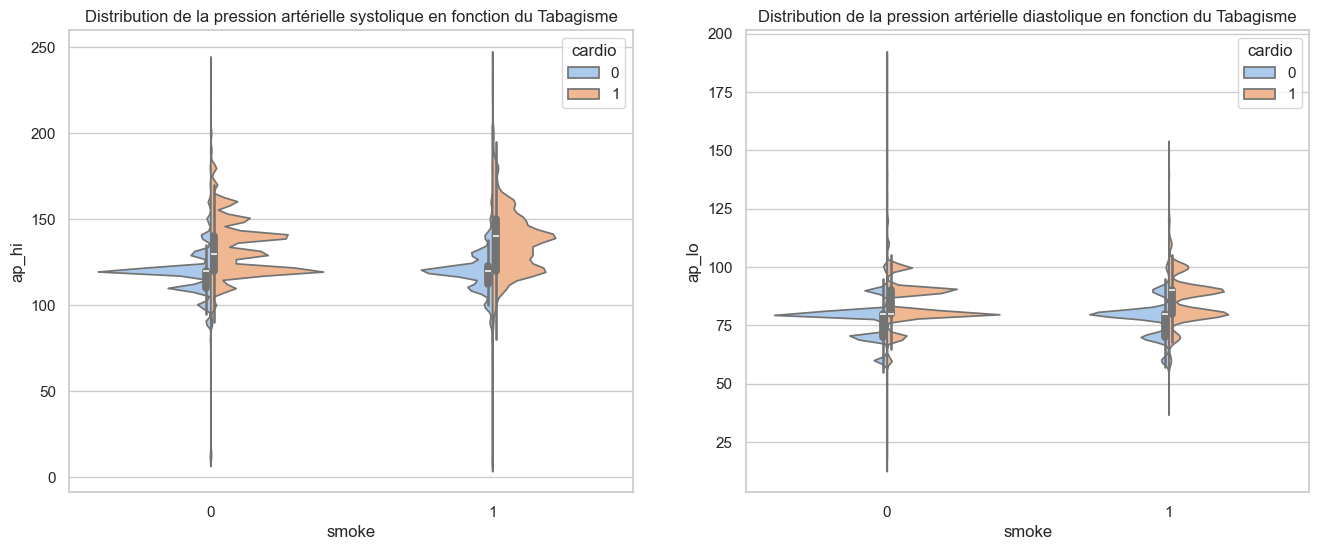

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.violinplot(x="smoke", y="ap_hi", hue="cardio", data=cleaned_data, split=True, palette="pastel", ax=axes[0])
axes[0].set_title('Distribution de la pression artérielle systolique en fonction du Tabagisme')

sns.violinplot(x="smoke", y="ap_lo", hue="cardio", data=cleaned_data, split=True, palette="pastel", ax=axes[1])
axes[1].set_title('Distribution de la pression artérielle diastolique en fonction du Tabagisme')
plt.show()

## Consommation d'alcool en fonction de l'Indice de Masse Corporelle (IMC)

## Physical activity / weight(imc) / cardio

# matrice de correlation

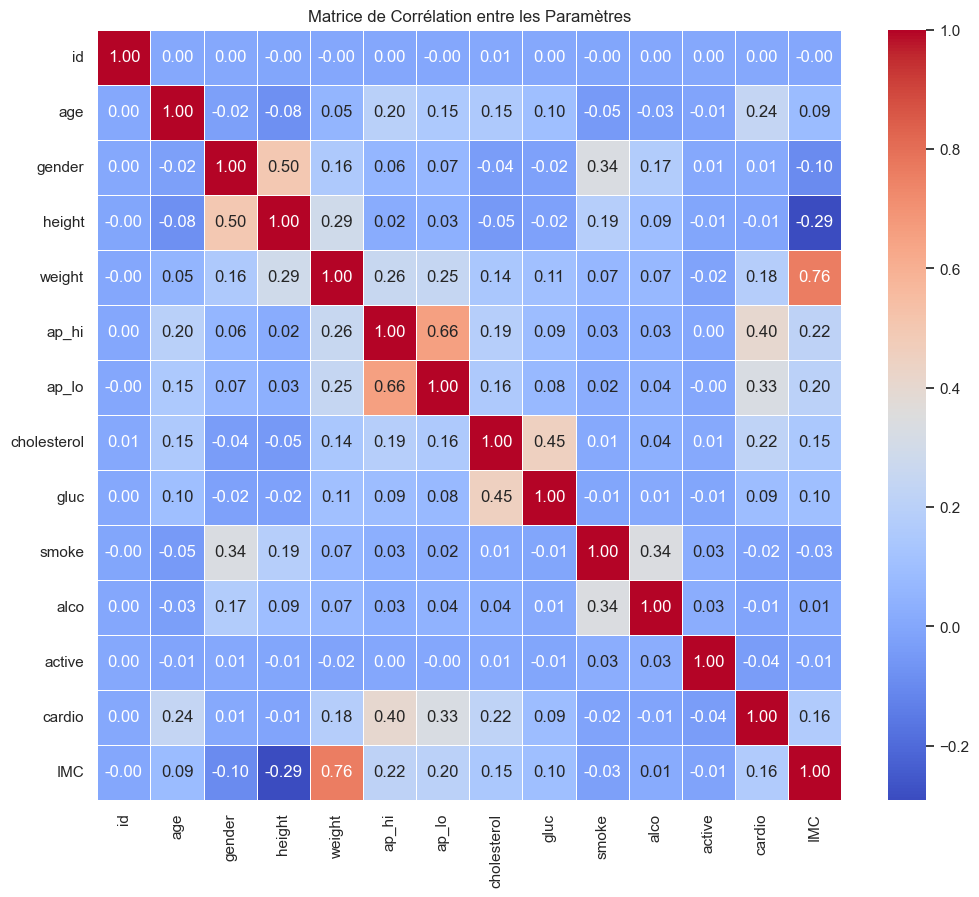

In [20]:
correlation_matrix = cleaned_data.corr()

# Paramètres de style
sns.set_theme(style="white")

# Création de la heatmap (carte thermique) de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation entre les Paramètres')
plt.show()

# Entrainement

In [24]:
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [21]:
X = cleaned_data.loc[:, cleaned_data.columns != 'cardio']
y = cleaned_data[['cardio']]

In [22]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble de test en ensembles de test et de validation
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Affichage des tailles des ensembles
print(f'Taille X_train : {X_train.shape}, Taille y_train : {y_train.shape}')
print(f'Taille X_test : {X_test.shape}, Taille y_test : {y_test.shape}')
print(f'Taille X_val : {X_val.shape}, Taille y_val : {y_val.shape}')

Taille X_train : (55169, 13), Taille y_train : (55169, 1)
Taille X_test : (6896, 13), Taille y_test : (6896, 1)
Taille X_val : (6897, 13), Taille y_val : (6897, 1)


In [23]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.54052019,  0.90963134,  1.36429991, ...,  4.18783601,
         0.49739866, -0.53949982],
       [-0.54804936,  0.02228721, -0.73297667, ..., -0.23878681,
         0.49739866,  1.4516217 ],
       [-1.60614243, -0.56927554, -0.73297667, ...,  4.18783601,
        -2.01045976,  0.34062237],
       ...,
       [ 1.02263117, -0.27349416, -0.73297667, ..., -0.23878681,
         0.49739866,  0.42561127],
       [-1.68926941,  0.02228721,  1.36429991, ..., -0.23878681,
         0.49739866,  0.31206879],
       [-0.93804273,  0.76174065,  1.36429991, ..., -0.23878681,
        -2.01045976, -0.74229811]])

In [25]:
column_names = ['Name', 'Model_Score', 'Training_Score', 'Testing_Score', 'precision', 'recall', 'f1', 'accuracy']

models_scoring = pd.DataFrame(columns=column_names)

def TrainModel(name, model, param_grid, X_train_scaled, y_train, X_test, y_test, X_val, y_val, models_scoring):

    #pour eviter le werning : "A column-vector y was passed when a 1d array was expected."
    y_train_flatten = y_train["cardio"]
    
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(5), scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train_flatten)

    best_model = grid_search.best_estimator_
    model_score = grid_search.best_score_
    training_score = best_model.score(X_train_scaled, y_train_flatten)
    testing_score = best_model.score(X_test, y_test)

    y_pred = best_model.predict(X_val)

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)


    # Création d'un dictionnaire avec les informations
    result_dict = {'Name': name,
                   'Model_Score': model_score,
                   'Training_Score': training_score,
                   'Testing_Score': testing_score,
                   'precision' : precision,
                   'recall' : recall,
                   'f1' : f1,
                   'accuracy' : accuracy
                   }
        
    # Ajout du dictionnaire à la DataFrame
    models_scoring = pd.concat([models_scoring, pd.DataFrame([result_dict])], ignore_index=True)



### Logistic Regression

In [26]:
lr_params = {
    'penalty': ['elasticnet', 'l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000],
    'solver': ['saga'],  # Ajoute cette ligne pour spécifier le solveur
    'tol':[0.001]
}

TrainModel('LogisticRegression', LogisticRegression(random_state=42), lr_params, X_train, y_train, X_test, y_test, X_val, y_val, models_scoring)

c:\Users\PC de MEDUSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC de MEDUSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC de MEDUSA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "

In [27]:
models_scoring

,Name,Model_Score,Training_Score,Testing_Score,precision,recall,f1,accuracy


### Decision Tree

In [ ]:
dt_param_grid = {
    #'criterion': ['gini', 'entropy', 'log_loss'],  # Fonction de critère pour la séparation
    'splitter': ['best'],  # Stratégie de séparation des nœuds
    'max_depth': list(np.arange(1,25)) + [None],  # Profondeur maximale de l'arbre
    'min_samples_split': np.arange(2,11),  # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': np.arange(1,6),  # Nombre minimum d'échantillons requis dans une feuille
    #'max_features': ['sqrt', 'log2', None]  # Nombre maximum de fonctionnalités à considérer pour la meilleure division
}

TrainModel('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42), dt_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, models_scoring)

### RandomForest

In [ ]:
rf_param_grid = {
    'n_estimators': np.arange(20, 220, 20),  # Nombre d'arbres dans la forêt
    'max_features': ['sqrt', 'log2', None],  # Nombre maximum de fonctionnalités à considérer pour la meilleure division
}

TrainModel('RandomForestClassifier', RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, models_scoring)

### SVM

In [ ]:
svm_param_grid = [
    {
        'C': [0.1, 1, 10],  # Paramètre de régularisation
        'kernel': ['linear'],
    },
    {
        'C': [0.1, 1, 10],  # Paramètre de régularisation
        'kernel': ['poly'],
        'degree': [2, 3, 4],  # Degré du noyau polynomial
    },
    {
        'C': [0.1, 1, 10],  # Paramètre de régularisation
        'kernel': ['rbf'],  # Noyau gaussien
        'gamma': ['scale', 'auto', 0.1, 1],  # Paramètre de largeur du noyau
    },
]

# Appelle la fonction TrainModelSVM avec ce paramètre
TrainModel('SVM', SVC(probability=True), svm_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, models_scoring)

### KNN

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7],  # Nombre de voisins à considérer
    'weights': ['uniform', 'distance'],  # Poids des voisins ('uniform' ou 'distance')
    'p': [1, 2],  # Paramètre de distance (1 pour la distance de Manhattan, 2 pour la distance euclidienne)
}

TrainModel('KNN', KNeighborsClassifier(), knn_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, models_scoring)

### XGBoost

In [ ]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

TrainModel('XGBoost', XGBClassifier(), knn_param_grid, X_train, y_train, X_test, y_test, X_val, y_val, models_scoring)

__________________________________________________________________________